## Question 1: Homography Theory

Suppose we have two cameras $\mathbf{C}_1$ and $\mathbf{C}_2$ looking at a common plane $\Pi$ in 3D space.  Any 3D point $\mathbf{P}$ on $\Pi$ generates a
projected 2D point located at $\mathbf{p} \equiv (u_1,v_1,1)^T$ on the first
camera $\mathbf{C}_1$ and $\mathbf{q} \equiv (u_2,v_2,1)^T$ on the second camera
$\mathbf{C}_2$.  Since $\mathbf{P}$ is confined to the plane $\Pi$, we expect
that there is a relationship between $\mathbf{p}$ and $\mathbf{q}$.  In
particular, there exists a common 3 $\times$ 3 matrix $\mathbf{H}$, so that for
any $\mathbf{p}$ and $\mathbf{q}$, the following conditions holds:
\begin{equation}
\mathbf{p \equiv Hq}
\label{eq:homography}
\end{equation}
We call this relationship **planar homography**.  Recall that both
$\mathbf{p}$ and $\mathbf{q}$ are in homogeneous coordinates and the equality
$\equiv$ means $\mathbf{p}$ is proportional to $\mathbf{Hq}$ (recall homogeneous
coordinates).  It turns out this
relationship is also true for cameras that are related by pure rotation without the planar constraint.

### 1.1 Homography (5 points)

Prove that there exists an $\mathbf{H}$ that
satisfies $\mathbf{p \equiv Hq}$ given two ${3 \times 4}$ camera projection
matrices $\mathbf{M_1}$ and $\mathbf{M_2}$ corresponding to cameras
$\mathbf{C_1}$, $\mathbf{C_2}$ and a plane $\Pi$.  Do not produce an actual
algebraic expression for $\mathbf{H}$.  All we are asking for is a proof of
the existence of $\mathbf{H}$.

*Note: A degenerate case may happen when the
plane $\Pi$ contains both cameras' centers, in which case there are infinite
choices of $\mathbf{H}$ satisfying $\mathbf{p \equiv Hq}$.  You can
ignore this case in your answer.*

---

(Talked through this with Paritosh at OH)

As always seems to be the case for these sort of "relationship under constraint" problems, the important piece of of the puzzle seems to be figuring how to apply the constraint to the basic problem. In our case we want to adjust the equations $M_1 P = p$ and $M_2 P = q$ such that $M_1$ and $M_2$ can be moved to the opposite side, preferably as invertible $3 \times 3$ matrices.

The crucial part to this problem is that, in the world coordinates, $P$ is of the form $\begin{bmatrix} X & Y & Z & 1 \end{bmatrix}^T$. It is a vector of length 4. However, we can can carefully choose a rigid transform for our coordinates in 3D space so that all of the points in the plane can be represented with two in-plane vectors, and the $Z$ value for all plane points is 0 for our transformed system. Thus $P^* = \begin{bmatrix} X' & Y' & 0 & 1 \end{bmatrix}^T$, where $X'$ and $Y'$ represent the point location in our transformed coordinates. Let $M_1^*$ and $M_2^*$ be the $M$ matrices with this rigid transform factored into the extrinsic matrix.

At this point, in the equations $M_1^* P^* = p$ and $M_2^* P^* = q$, we have an entirely useless column of the $M$ matrices. Because of the zero in $P'$ it's effectively as if the third column of $M$ and the third element in $P^*$ (0) were just dropped entirely. Let's call $M_1'$ and $M_2'$ the matrices with the third column dropped, so now they are $3 \times 3$ matrices. $P'$ will be the $P^*$ vector with the zero element dropped. Assuming for now that the matrices are invertible, we can formulate our homography:

\begin{align*}
    M_1'^{-1} p  &= P' = M_2'^{-1} q \\
    p &= M_1' M_2'^{-1} q \\
    p &= H q  && \text{Collapse to a single $3 \times 3$ matrix, which takes the $H$ relationship} \\
\end{align*}

At this point we have shown that a homography exists (assuming $M$'s are invertible) but we haven't actually calculated how to get it. The missing step is from $M$ to $M*$, we know that sort of coordinate transform is always possible with a plane but we didn't how how to do it. That's fine, we'll leave it like that for this problem.

We assumed above that the $M$ matrices were invertible. Are they always? It appears that unless the cameras are on the same plane as the point $P$ then we are fine, the matrices invert. A common-sense way to think about this is to think about the operation $M_1'^{-1} p = P'$, which is a 2D to 3D projection onto a plane. If the camera is on the plane that operation doesn't make sense, but in all other cases you can imagine tracining a point from an arbitrary camera onto the given plane.

TODO: Cogitate more deeply on this part.

M will not be full rank if the camera is on the plane of the point? See what happens

---

### 1.2 Homography under rotation (5 points)

Prove that there exists a homography $\mathbf{H}$ that satisfies $\mathbf{p_1} \equiv \mathbf{Hp_2}$, given two cameras separated by a pure rotation. That is, for camera 1, $\mathbf{p_1} = \mathbf{K_1} \begin{bmatrix} \mathbf{I} & \mathbf{0} \end{bmatrix} \mathbf{P}$ and for camera 2, $\mathbf{p_2} = \mathbf{K_2} \begin{bmatrix}\mathbf{R} & \mathbf{0} \end{bmatrix} \mathbf{P}$. Note that $\mathbf{K_1}$ and $\mathbf{K_2}$ are the $3 \times 3$ intrinsic matrices of the two cameras and are different. $\mathbf{I}$ is $3 \times 3$ identity matrix, $\mathbf{0}$ is a $3\times1$ zero vector and $\mathbf{P}$ is the homogeneous coordinate of a point in 3D space. $\mathbf{R}$ is the $3 \times 3$ rotation matrix of the camera.

---

Let's first look at $p_1$

\begin{align*}
p_1 & \equiv K_1 \begin{bmatrix} I & 0 \end{bmatrix} P \\
K_1^{-1} p_1 & \equiv \begin{bmatrix} I & 0 \end{bmatrix} P  && \text{$3 \times 3$, full rank, invertible} \\
& \equiv P_{1,2,3}  && \text{$P$ started as $4 \times 1$, last element is zeroed out} \\
\end{align*}

Something important happened there, where $\begin{bmatrix} I & 0 \end{bmatrix} P$ was substituted for $P_{1, 2, 3}$. The last element in $P$ was dropped. This is a reasonable operation because no matter what the last column of $P$ is it will be wiped out by that zero column in $\begin{bmatrix} I & 0 \end{bmatrix}$. Then we do a similar operation for $p_2$.

\begin{align*}
p_2 & \equiv K_2 \begin{bmatrix} R & 0 \end{bmatrix} P \\
K_2^{-1} p_2 & \equiv \begin{bmatrix} R & 0 \end{bmatrix} P  && \text{$3 \times 3$, full rank, invertible} \\
& \equiv R P_{1,2,3}  && \text{$P$ started as $4 \times 1$, last element is zeroed out} \\
R^T K_2^{-1} p_2 & \equiv P_{1,2,3}  && \text{Orthonormal rotation matrices can be inverted with $R^T$} \\
\end{align*}

Then put them together
\begin{align*}
P_{1,2,3} &= P_{1,2,3} \\
K_1^{-1} p_1 & \equiv R^T K_2^{-1} p_2 \\
p_1 & \equiv K_1 R^T K_2^{-1} p_2 \\
\end{align*}

Since all the matrices here are $3 \times 3$, we can collapse everything to the form $p_1 \equiv H p_2$.

---

### 1.3 Correspondences (10 points)

Let $\mathbf{x_1}$ be a set of points in an image and $\mathbf{x_2}$ be the set of corresponding points in an image taken by another camera. Suppose there exists a homography $\mathbf{H}$ such that:
$\mathbf{x^i_1} \equiv \mathbf{Hx^i_2}\quad(i \in \{1\dots N\})$
where $\mathbf{x^i_1} = \left[\begin{matrix}x^i_1 & y^i_1 & 1\end{matrix}\right]^T$ are in homogenous coordinates, $\mathbf{x_1^i \in \mathbf{x_1}}$ and $\mathbf{H}$ is a $3 \times 3$ matrix. For each point pair, this relation can be rewritten as
\begin{equation*}
\mathbf{A_ih} = 0
\end{equation*}
where $\mathbf{h}$ is a column vector reshaped from $\mathbf{H}$, and $\mathbf{A_i}$ is a matrix with elements derived from the points $\mathbf{x^i_1}$ and $\mathbf{x^i_2}$. This can help calculate **H** from the given point correspondences.

   - How many degrees of freedom does $\mathbf{h}$ have? (3 points)

   - How many point pairs are required to solve $\mathbf{h}$? (2 points)

   - Derive $\mathbf{A_i}$. (5 points)

---

### How many degrees of freedom does $\mathbf{h}$ have?

This is simple, it's something we went over in class. A homography matrix has 9 elements ($3 \times 3$ matrix) but homographies represent the same operation even with an arbitrary scaling term applied. Therefore we take away a degree of freedom, and $\mathbf{H}$ matrices will have 8 degrees of freedom. Since $\mathbf{h}$ is just a flattening of $\mathbf{H}$, it also has 8 DOF.

### How many point pairs are required to solve $\mathbf{h}$?

As we'll see when building $\mathbf{A}_\mathbf{i}$, each point will give us two equations. Since we have 8 DOF, and each point pair provides two equations, then we need four point pairs to solve for $\mathbf{h}$.

### Derive $\mathbf{A}_\mathbf{i}$

This is simple, almost exactly something we walked through in class. I'll walk through the steps. First, let's define $H$ in terms of its rows:

\begin{align*}
    H &= \begin{bmatrix}
        h_1 & h_2 & h_3 \\
        h_4 & h_5 & h_6 \\
        h_7 & h_8 & h_9 \\
    \end{bmatrix}
    = \begin{bmatrix}
        p_1^T \\
        p_2^T \\
        p_3^T \\
    \end{bmatrix}
\end{align*}

So we've defined $p_i^T$ as the rows of $H$. Next let's relate the points $x_1^i$ and $x_2^i$ using this homography.

\begin{align*}
    x_1^i & \equiv H x_2^i \\
    & \equiv \begin{bmatrix}
        p_1^T \\
        p_2^T \\
        p_3^T \\
    \end{bmatrix} x_2^i \\
    &= \alpha \begin{bmatrix}
        p_1^T \\
        p_2^T \\
        p_3^T \\
    \end{bmatrix} x_2^i  && \text{Replace $\equiv$ with the arbitrary scale factor $alpha$}
\end{align*}

Now we have three equations (one per row) but they are equivalences instead of equalities. The trick to removing the scale factor is to take row 1 (includes $\alpha$) and divide it by row 3 (includes $\alpha$) to make a single equation. Then repeat that process for row 2 / row 3. That leaves us two equations:

\begin{align*}
    x_1'^i &= \frac{p_1^T x_2^i}{p_3^T x_2^i}  && \text{$x_1'^i$ is the $x$ component divided by $z$ component of the $x_1^i$ vector} \\
    0 &= p_1^T x_2^i - p_3^T x_2^i x_1'^i \\
    y_1'^i &= \frac{p_2^T x_2^i}{p_3^T x_2^i}  && \text{$y_1'^i$ is the $y$ component divided by $z$ component of the $x_1^i$ vector} \\
    0 &= p_2^T x_2^i - p_3^T x_2^i y_1'^i \\
\end{align*}

Switched to matrix form, we get two matrix rows from these two equations:
\begin{align*}
    \begin{bmatrix}
        x_2^{iT} & \mathbf{0} & -x_2^{iT} x_1'^i \\
        \mathbf{0} & x_2^{iT} & -x_2^{iT} y_1'^i
    \end{bmatrix}
    \begin{bmatrix} p_1 \\ p_2 \\ p_3 \end{bmatrix}
    &= \mathbf{0}  && \text{$x_1'^i$ and $y_1'^i$ are scalars} \\
    & && \text{Matrices are $2 \times 9$, $9 \times 1$, and $2 \times 1$}
\end{align*}

In this case, the $2 \times 9$ matrix on the left-hand side is $\mathbf{A_i}$, and the $9 \times 1$ matrix on the right is $\mathbf{h}$. You can stack $\mathbf{A}$ higher and higher, two rows for each point pair, and then solve the whole thing with SVD, constrained to not get the trivial solution.

---

### 1.4 Understanding homographies under rotation (5 points)

Suppose that a camera is rotating about its center $\mathbf{C}$, keeping the intrinsic parameters $\mathbf{K}$ constant. Let $\mathbf{H}$ be the homography that maps the view from one camera orientation to the view at a second orientation. Let $\theta$ be the angle of rotation between the two. Show that $\mathbf{H^2}$ is the homography corresponding to a rotation of 2$\theta$. Please limit your answer within a couple of lines. A lengthy proof indicates that you're doing something too complicated (or wrong).

---

Since $H$ is the homography from one view to the next with angle $\theta$, regardless of the starting position, then we can choose an arbitrary point homography

\begin{align*}
    p = Hq  && \text{$p$ and $q$ are the image coordinates for $P$ in 3D}
\end{align*}

Similarly, if we were to start where the camera mapped $P$ to $q$, and then rotate again by the same homography, we would get a new relationship, where $r$ is the image coordinates for $P$ after another transform.

\begin{align*}
    q = Hr
\end{align*}

So now if we want to find the transformation from $p$ to $r$ we simply substitute $q$ out of the equation and see that $H^2$ will take us two successive $\theta$ steps.

\begin{align*}
    p = Hq \\
    p = H(Hr) \\
    p = H^2 r \\
\end{align*}

This makes intuitive sense with regards to linear transforms. If you imagine an $R_z$ matrix that rotates by $\phi$ degrees around the $z$ axis, applying the matrix multiple times results in successive rotations.

---

### 1.5 Limitations of the planar homography (2 points)

Why is the planar homography not completely sufficient to map any arbitrary scene image to another viewpoint? State your answer concisely in one or two sentences.

---

As we saw in problem 1.1, we were only able to solve for the homography by making a simplifying assumption (all points lie on a plane), which allowed us to drop the $3 \times 4$ matrix down to an equivalent $3 \times 3$ matrix and move the matrices around to solve for a relationship between image coordinates in different views. Without that planarity assumption (with an arbitrary 3D scene) we cannot get a homography between image coordinates.

TODO: Talk to people about a more intuitive understanding

---

### 1.6 Behavior of lines under perspective projections (3 points)

We stated in class that perspective projection preserves lines (a line in 3D is projected to a line in 2D). Verify algebraically that this is the case, i.e., verify that the projection $\mathbf{P}$ in $\mathbf{x} = \mathbf{PX}$ preserves lines.

---

I feel like I'm making this approach up a bit, but let's take three *evenly spaced* points in 3D space that appear on a line: $X_1, X_2, X_3$. The center point, $X_2$, lies in the middle of the other two. Because they lie on a line and are evenly spaced, we know that $(X_2 - X_1) + (X_2 - X_3) = 0$. In English this is a statement about parallelism, it's saying that $X_2 - X_1$ and $X_2 - X_3$ are two vectors in line with each other and in opposing directions, such that they cancel each other out.

From here it's simple to show that $(x_2 - x_1) + (x_2 - x_3)$ likewise equals 0, showing not only that perspective projection preserves lines but also preserves ratios between points.

\begin{align*}
    (x_2 - x_1) + (x_2 - x_3) & \equiv (PX_2 - PX_1) + (PX_2 - PX_3) \\
    & \equiv P(X_2 - X_1 + X_2 - X_3)  && \text{Distributive property of matrices} \\
    &= 0  && (X_2 - X_1) + (X_2 - X_3) = 0
\end{align*}

---

### 2.4 Check Point: Descriptor Matching (5 pts)

Save the resulting figure and submit it in your PDF. Briefly discuss any cases that perform worse or better.

---

Here are the results of feature matches between "chickenbroth_01.jpg" and "chickenbroth_03.jpg". One thing I noticed is that feature matches can be troublesome when there are multiple of the same object in a scene. For example, in the right hand image there are multiple of the same soup cans, so some points are matched to different cans. In addition there are some black background points that seem to map to other black background points without much reference to correctness of match (see along the bottom of the left image).

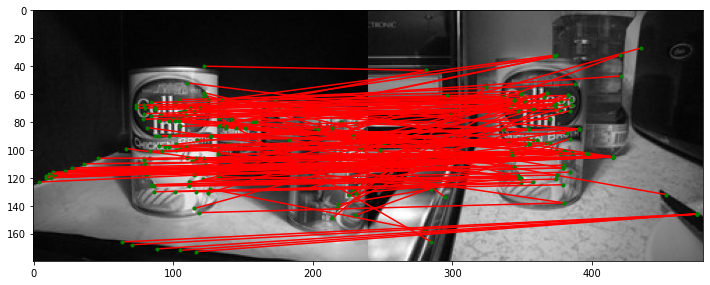

---

### 2.5 BRIEF and rotations (5 pts)

Include your code and the historgram figure in your PDF, and explain why you think  the descriptor behaves this way.

---

The code is a little interesting. I made a `project_rotation()` function that takes in points and returns what they would be in a rotated image. I use that to filter out incorrect BRIEF matches. If the BRIEF matches don't line up with the ideal rotated versions (to within 3 pixels) I toss the match. This is all done using the original image rotated, so there should be many exact matches. Here's the histogram of correct matches over rotation, it really seems to perform poorly on rotated objects.

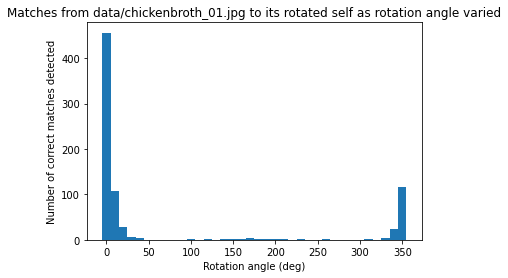

---

In [ ]:
from scipy.ndimage.interpolation import rotate


path1 = "data/chickenbroth_01.jpg"
im1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE).astype(float) / 255
im2 = im1.copy()


def project_rotation(points, old_center, new_center, angle):
    """
    Arguments:
        points: int ndarray of shape (N, 2), with [axis0, axis1] points
        old_center: int ndarray of shape (2,), specifying the center of the
            original image (where rotation is around)
        new_center: int ndarray of shape (2,), specifying the center of the
            rotated image (where rotation is around)
        angle: (float) angle we're rotating in radians
    
    Returns:
        int ndarray of shape (N, 2), with the projected rotation points
    """
    points = points.copy()
    points -= old_center
    R = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle), np.cos(angle)],
    ])
    # Equivalent to (R @ points.T).T
    points = points @ R.T
    points += new_center
    return points.astype(int)


angles = np.arange(0, 360, 10)
num_matches = []
for angle_deg in angles:
    im2_rotated = rotate(input=im2, angle=angle_deg)
    locs1, desc1 = briefLite(im1)
    locs2, desc2 = briefLite(im2_rotated)
    matches = briefMatch(desc1, desc2)
    # plotMatches(cv2.imread(path1),
    #             rotate(input=cv2.imread(path1), angle=angle_deg),
    #             matches,
    #             locs1,
    #             locs2)
    correct_p2 = project_rotation(
        points=locs1[:, 0:2],
        old_center=(np.array(im1.shape) / 2).astype(int),
        new_center=(np.array(im2_rotated.shape) / 2).astype(int),
        angle=np.deg2rad(angle_deg),
    )
    # plotMatches(cv2.imread(path1),
    #             rotate(input=cv2.imread(path1), angle=angle_deg),
    #             np.array([range(len(locs1))] * 2).T[::20],
    #             locs1,
    #             correct_p2)
    tol = 3  # 3 pixel tolerance, arbitrary choice
    correct_matches = np.array([
        match for match in matches
        if np.linalg.norm(correct_p2[match[0]] - locs2[match[1]]) < tol
    ])
    num_matches.append(correct_matches.shape[0])
    plotMatches(cv2.imread(path1),
                rotate(input=cv2.imread(path1), angle=angle_deg),
                correct_matches,
                locs1,
                locs2)

plt.bar(angles, num_matches, width=10)
plt.xlabel("Rotation angle (deg)")
plt.ylabel("Number of correct matches detected")
plt.title(f"Matches from {path1} to its rotated self as rotation angle varied")
plt.show()

### 2.6 Improving Performance - (Extra Credit, 10 pts)

The extra credit opportunities described below are optional and provide an
avenue to explore computer vision and improve the performance of the techniques developed above.

   1. ($\textbf{5 pts}$) As we have seen, BRIEF is not rotation invariant. Design a simple fix to solve this problem using the tools you have developed so far (think back to edge detection and/or Harris corner's covariance matrix).  Include yout code in your PDF, and explain your design decisions and how you selected any parameters that you use. Demonstrate the effectiveness of your algorithm on image pairs related by large rotation.

   2. ($\textbf{5 pts}$) This implementation of BRIEF has some scale invariance, but there are limits.  What happens when you match a picture to the same picture at half the size?  Look to section 3 of [Lowe2004](https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf) for a technique that will make your detector more robust to changes in scale. Implement it and demonstrate it in action with several test images. Include yout code and the test images in your PDF. You may simply rescale some of the test images we have given you. 

---

YOUR ANSWER HERE...

---

### 3.3 Automated Homography Estimation/Warping for Augmented Reality (10 points)

Implement the following steps: 
   1. Reads $\texttt{cv_cover.jpg}$, $\texttt{cv_desk.png}$, and $\texttt{hp_cover.jpg}$.
   2. Computes a homography automatically using $\texttt{computeH_ransac}$.
   3. Warps $\texttt{hp_cover.jpg}$ to the dimensions of the $\texttt{cv_desk.png}$ image using the OpenCV $\texttt{warpPerspective}$ function. 
   4. At this point you should notice that although the image is being warped to the correct location, it is not filling up the same space as the book. Why do you think this is happening? How would you modify $\texttt{hp_cover.jpg}$ to fix this issue?
   5. Implement the function: $\texttt{function [ composite_img ] = compositeH( H2to1, template, img) }$ to now compose this warped image with the desk image as in the following figures.
   6. Include your resulting image in your write-up. Please also print the final H matrix in your writeup (normalized so the bottom right value is 1)

---

1. I read in the three images, no problems there
2. The homography between `"cv_cover"` and `"cv_desk"` was calculated using `computeH_ransac`. The H matrix is as follows, and here you can see a visualization of the matches.

```
H_cvcover_to_cvdesk:
[[  0.208068  -0.017784 193.299318]
 [ -0.355831   0.714279 240.654462]
 [ -0.000952  -0.000037   1.      ]]
```

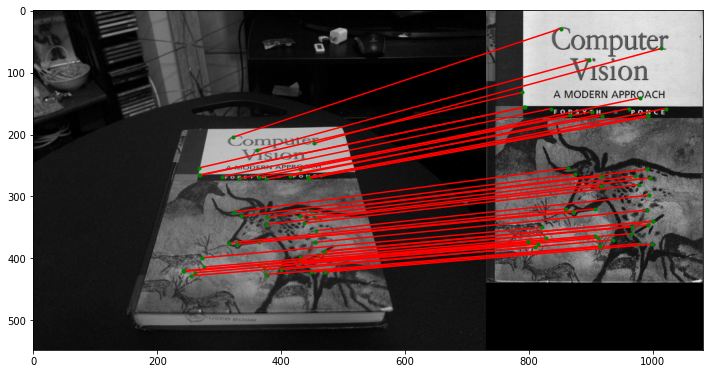

3. I warped `"𝚑𝚙⎯𝚌𝚘𝚟𝚎𝚛.𝚓𝚙𝚐"` to the dimensions of `"𝚌𝚟⎯𝚍𝚎𝚜𝚔.𝚙𝚗𝚐"` using `cv2.𝚠𝚊𝚛𝚙𝙿𝚎𝚛𝚜𝚙𝚎𝚌𝚝𝚒𝚟𝚎` (visualization below). Originally I did this in greyscale but later switch it to color to try and match the example images.
4. I think the issue mentioned in 4) is due to `"hp_cover"` being a smaller image. I didn't actually get to the point of trying to visualize this, I added a `cv2.resize` to make the cover sizes match when trying to get `cv2.𝚠𝚊𝚛𝚙𝙿𝚎𝚛𝚜𝚙𝚎𝚌𝚝𝚒𝚟𝚎` to work.
5. I made the function `compositeH(H, template, img)` to add the Harry Potter cover onto the CV book, visualization below.
6. The final resulting image is shown here. Note that the `H` matrix is above, given after step 2.

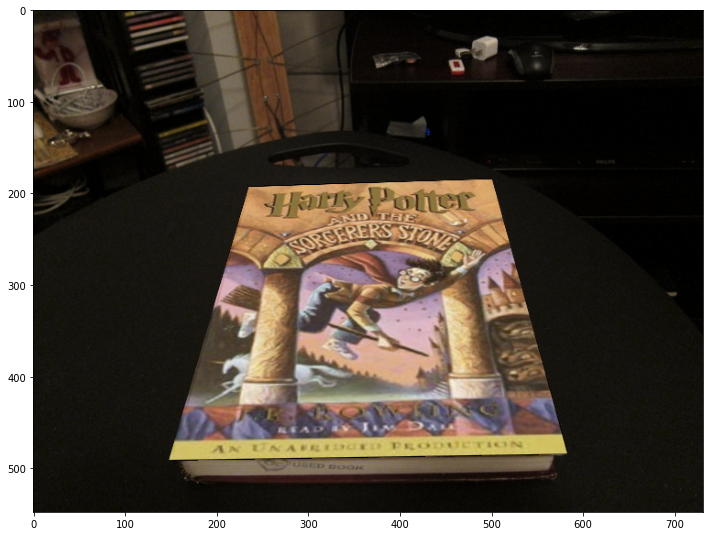

---

### 4.1 Image Stitching (5 pts)

Visualize the warped image. Please include the image and your H2to1 matrix (with the bottom right index as 1) in your writeup PDF, along with stating which image pair you used.

---

I used `"data/incline_L.png"` and `"data/incline_R.png"` as my image pair, since `"𝚍𝚊𝚝𝚊/𝚙𝚗𝚌𝟷.𝚓𝚙𝚐"` and `"𝚍𝚊𝚝𝚊/𝚙𝚗𝚌𝟶.𝚓𝚙𝚐"` were not available in my zip folder.

Here is the `H` matrix that was calculated, as well as a visualization of the matched points:

```
[[  0.831901  -0.082527  -8.719078]
 [ -0.067889   0.620337 368.410056]
 [ -0.000078  -0.000363   1.      ]]
```

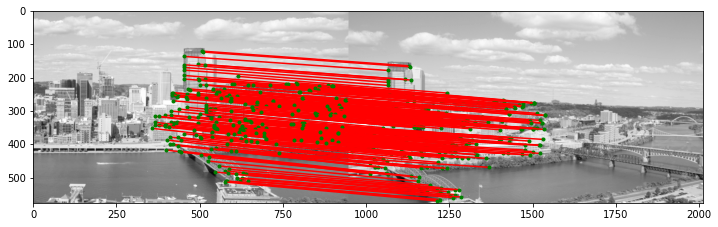

Here is my combined warped image, clipped to the size of `im1`. As discussed in 4.2, one initial approach is to only render on the given area of `im1`, which loses some of the `im2` information.

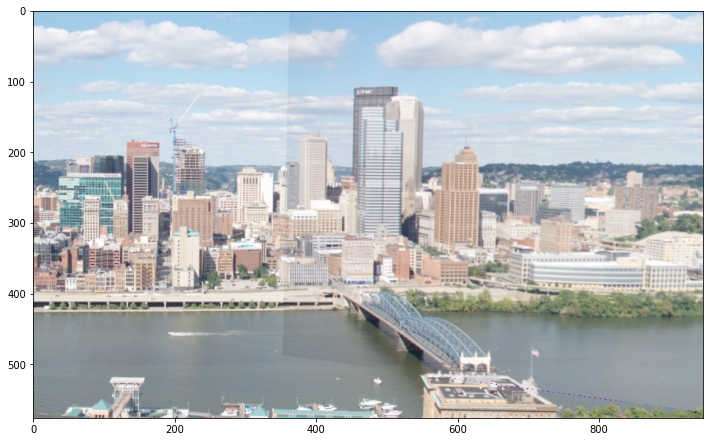

---

### 4.2 Image Stitching with No Clip (3 pts)

Visualize the warped image. Please include the image in your writeup PDF, along with stating which image pair you used.

---

I used `"data/incline_L.png"` and `"data/incline_R.png"` as my image pair, since `"𝚍𝚊𝚝𝚊/𝚙𝚗𝚌𝟷.𝚓𝚙𝚐"` and `"𝚍𝚊𝚝𝚊/𝚙𝚗𝚌𝟶.𝚓𝚙𝚐"` were not available in my zip folder. Here is a visualization of the unclipped warped image, using image 2 only:

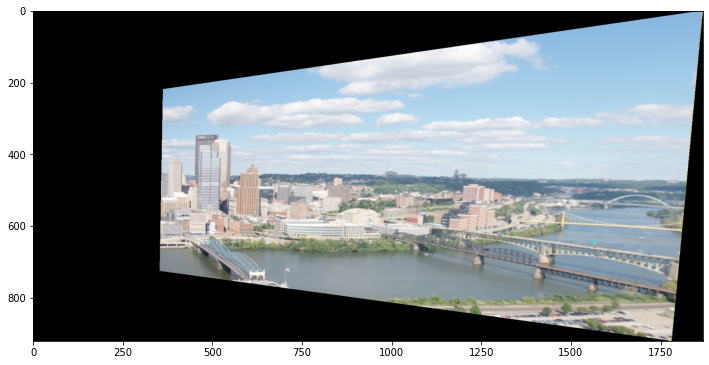

I wasn't sure if 4.2 was looking for the warped `im2` only, or if it was supposed to be the panorama. For surety, here is the unclipped panorama:

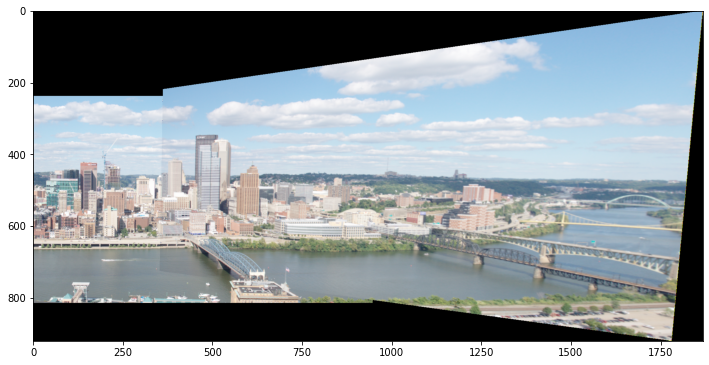

---

### 4.3 Generate Panorama (2 pts)

Save the resulting panorama on the full sized images and include the figure and computed homography matrix in your writeup.

---

Here is the `H` matrix between the left and right incline images:
```
[[  0.831901  -0.082527  -8.719078]
 [ -0.067889   0.620337 368.410056]
 [ -0.000078  -0.000363   1.      ]]
```

And here is the unclipped panorama again:
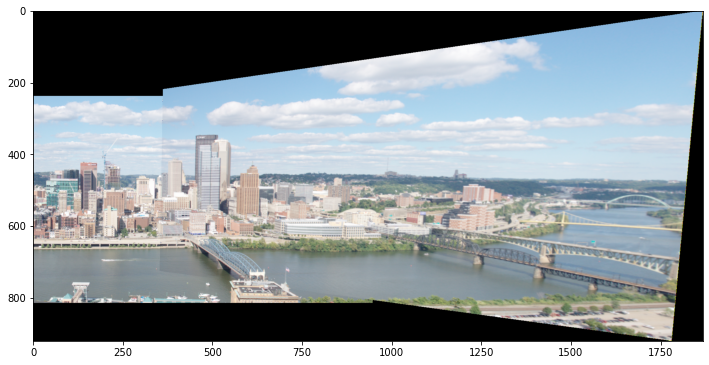

---

### 4.4 extra credits (3 pts)

Collect a pair of your own images (with your phone) and stitch them together using your code from the previous section. Include the pair of images and their result in the write-up.

---

YOUR ANSWER HERE...

---

### 4.5 extra credits (2 pts)

Collect at least 6 images  and stitch them into a single noClip image. You can either collect your own, or use the [PNC Park images](http://www.cs.jhu.edu/~misha/Code/SMG/PNC3.zip) from Matt Uyttendaele. We used the PNC park images (subsmapled to 1/4 sized) and ORB keypoints and descriptors for our reference solution.

---

YOUR ANSWER HERE...

---

## Question 5: Poisson Image Stitching (15 points)

Write a function called $\texttt{poisson_blend(background,foreground,mask)}$ which takes 3 equal sized images (background and foreground as RGB, mask as binary) and solves the Poisson equation, using gradients from foreground and boundary conditions from the background. 

**The problem will be manually graded.** Please include results from both the $\texttt{(fg1,bg1,mask1)}$ and $\texttt{(fg2,bg2,mask2)}$ images in your write-up.

---

YOUR ANSWER HERE...

---